# What are Hyper Parameters

***Hyper Parameters are settings that control the learning process of a model***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [2]:
#Load Dataset
df = load_iris()
X = df.data
y = df.target

In [3]:
#Define HyperParameter Grid
param_grid = {
    'n_estimators':[10,50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [4]:
#Splitting the training and testing sets(80-20 Splits)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [6]:
#Apply Grid Search CV
grid_search = GridSearchCV(RandomForestClassifier(),param_grid,cv = 5, n_jobs=1,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=1)

In [8]:
#Get Best Parameters
print(f"The Best Parameters from Grid Search is : {grid_search.best_params_}")

The Best Parameters from Grid Search is : {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}


In [11]:
#Apply Randomized Search
random_search = RandomizedSearchCV(RandomForestClassifier(),param_grid,cv = 5, n_jobs = -1, verbose = 1)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=1)

In [12]:
#Get The Best Parameters
print(f"The Best Paramters from random search is {random_search.best_params_}")

The Best Paramters from random search is {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}


In [13]:
#Evaluate the Model Performance
#Train the model with best parameters
best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_

In [14]:
#Predictions
y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)

In [17]:
#Accuracy Scores
acc_grid = accuracy_score(y_test,y_pred_grid)
ac_random = accuracy_score(y_test,y_pred_random)

In [19]:
print(f"The accuracy score for grid search cv is : {acc_grid:.2f}")
print(f"The accuracy score for random search cv is {ac_random:.2f}")

The accuracy score for grid search cv is : 1.00
The accuracy score for random search cv is 1.00


In [21]:
#Printing Confusion Matrix
print(f"Confusion Matrix for Grid Search CV is {confusion_matrix(y_test,y_pred_grid)}")
print(f"Confusion Mtrix for Random Search CV is {confusion_matrix(y_test,y_pred_random)}")

Confusion Matrix for Grid Search CV is [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Confusion Mtrix for Random Search CV is [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


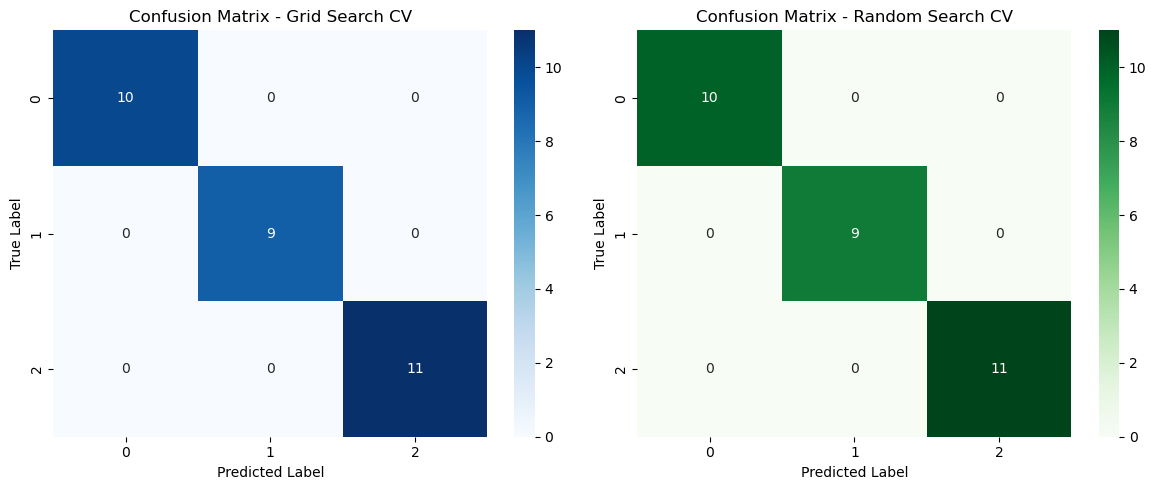

In [23]:
# Compute confusion matrices
cm_grid = confusion_matrix(y_test, y_pred_grid)
cm_random = confusion_matrix(y_test, y_pred_random)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Confusion Matrix for Grid Search CV
sns.heatmap(cm_grid, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Grid Search CV")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot Confusion Matrix for Random Search CV
sns.heatmap(cm_random, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Search CV")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Show the plot
plt.tight_layout()
plt.show()